In [1]:
import ibm_boto3
from ibm_botocore.client import Config
import os, json, warnings

warnings.filterwarnings('ignore')


In [2]:
cos_credentials = {
  "apikey": "jxMi4cSODyADbOzNJKKrC6GwmFMvwIQOS2-hkUsQRMAI",
  "cos_hmac_keys": {
    "access_key_id": "a72a8ef2b1544da28e6cf03c639c220d",
    "secret_access_key": "e7af0ac078a24117e241521fd5d4e8270d626f7921ef0326"
  },
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key a72a8ef2-b154-4da2-8e6c-f03c639c220d",
  "iam_apikey_name": "cloud_storage_credential",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9f7b5df93e4b41b281e49c0bb5433b09::serviceid:ServiceId-65e5ab2d-d97a-4ba8-bc89-4a61969569d6",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/9f7b5df93e4b41b281e49c0bb5433b09:6c10a5bd-d8f4-4d92-80f5-4afe01fa85fd::"
}




api_key = cos_credentials['apikey']
service_instance_id = cos_credentials['resource_instance_id']
auth_endpoint = 'https://iam.bluemix.net/oidc/token'
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'

In [3]:
cos = ibm_boto3.resource('s3',
                         ibm_api_key_id=api_key,
                         ibm_service_instance_id=service_instance_id,
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)

In [6]:
date_time = '2019-05-03-00-00'
buckets = {'data': 'train-data-exp-' + date_time, 'results': 'train-result-exp-' + date_time}

for bucket in buckets.values():
    if not cos.Bucket(bucket) in cos.buckets.all():
        print('Creating bucket "{}"...'.format(bucket))
        try:
            cos.create_bucket(Bucket=bucket)
        except ibm_boto3.exceptions.ibm_botocore.client.ClientError as e:
            print('Error: {}.'.format(e.response['Error']['Message']))
    else:
        print('Bucket "{}" already exists.'.format(bucket))

Creating bucket "train-data-exp-2019-05-03-00-00"...
Creating bucket "train-result-exp-2019-05-03-00-00"...


In [7]:
data_links = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
              'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
              'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
              'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

In [9]:
!pip install wget

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [10]:
import wget, glob

data_dir = 'MNIST_DATA'
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

for link in data_links:
    if not os.path.isfile(os.path.join(data_dir, os.path.join(link.split('/')[-1]))):
        wget.download(link, out=data_dir)

glob.glob('MNIST_DATA/*')

['MNIST_DATA/train-images-idx3-ubyte.gz',
 'MNIST_DATA/t10k-labels-idx1-ubyte.gz',
 'MNIST_DATA/train-labels-idx1-ubyte.gz',
 'MNIST_DATA/t10k-images-idx3-ubyte.gz']

In [11]:
bucket_name = buckets['data']
bucket_obj = cos.Bucket(bucket_name)

for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename), 'rb') as data: 
        bucket_obj.upload_file(os.path.join(data_dir, filename), filename)
        print('{} is uploaded.'.format(filename))

train-images-idx3-ubyte.gz is uploaded.
t10k-labels-idx1-ubyte.gz is uploaded.
train-labels-idx1-ubyte.gz is uploaded.
t10k-images-idx3-ubyte.gz is uploaded.


In [12]:
for obj in bucket_obj.objects.all():
    print('Object key: {}, size: {:5.1f}kB'.format(obj.key, obj.size/1024))

Object key: t10k-images-idx3-ubyte.gz, size: 1610.2kB
Object key: t10k-labels-idx1-ubyte.gz, size:   4.4kB
Object key: train-images-idx3-ubyte.gz, size: 9680.1kB
Object key: train-labels-idx1-ubyte.gz, size:  28.2kB


In [13]:
wml_credentials = {
  "apikey": "HoPaS9-RoXpyX_UyM_0wS4-AgrFY9MITjO_bd_uS7vfU",
  "iam_apikey_description": "Auto-generated for key c25fcd7f-dd9a-4a78-a225-35bfb61b3e94",
  "iam_apikey_name": "Service credentials-demo",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9f7b5df93e4b41b281e49c0bb5433b09::serviceid:ServiceId-869702b1-8041-491e-9936-5916f6dba146",
  "instance_id": "206a0912-d8d6-4f82-9e40-92a9d609aa76",
  "password": "71d660b4-0d14-42d8-9d1d-740c014b803e",
  "url": "https://us-south.ml.cloud.ibm.com",
  "username": "c25fcd7f-dd9a-4a78-a225-35bfb61b3e94"
}

In [14]:
!pip install --upgrade watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: lomond in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/l

In [113]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [114]:
client = WatsonMachineLearningAPIClient(wml_credentials)


In [115]:
print(client.version)


1.0.365


In [21]:
#training

In [116]:
model_definition_tf_metadata = {
            client.repository.DefinitionMetaNames.NAME: "Tensorflow - distributed",
            client.repository.DefinitionMetaNames.AUTHOR_EMAIL: "le10772@umbc.edu",
            client.repository.DefinitionMetaNames.FRAMEWORK_NAME: "tensorflow",
            client.repository.DefinitionMetaNames.FRAMEWORK_VERSION: "1.5",
            client.repository.DefinitionMetaNames.RUNTIME_NAME: "python",
            client.repository.DefinitionMetaNames.RUNTIME_VERSION: "3.5",
            client.repository.DefinitionMetaNames.EXECUTION_COMMAND: "PS_HOSTS_COUNT=1 ./launcher.py python3 ${MODEL_DIR}/mnist_dist.py --data_dir ${DATA_DIR}"
            }

In [117]:
model_definition_horovod_metadata = {
            client.repository.DefinitionMetaNames.NAME: "Tensorflow - horovod",
            client.repository.DefinitionMetaNames.AUTHOR_EMAIL: "le10772@umbc.edu",
            client.repository.DefinitionMetaNames.FRAMEWORK_NAME: "tensorflow-horovod",
            client.repository.DefinitionMetaNames.FRAMEWORK_VERSION: "1.5",
            client.repository.DefinitionMetaNames.RUNTIME_NAME: "python",
            client.repository.DefinitionMetaNames.RUNTIME_VERSION: "3.5",
            client.repository.DefinitionMetaNames.EXECUTION_COMMAND: "python tensorflow_mnist.py"
            }

In [118]:
model_definition_ddl_metadata = {
            client.repository.DefinitionMetaNames.NAME: "Tensorflow - ddl",
            client.repository.DefinitionMetaNames.AUTHOR_EMAIL: "le10772@umbc.edu",
            client.repository.DefinitionMetaNames.FRAMEWORK_NAME: "tensorflow-ddl",
            client.repository.DefinitionMetaNames.FRAMEWORK_VERSION: "1.5",
            client.repository.DefinitionMetaNames.RUNTIME_NAME: "python",
            client.repository.DefinitionMetaNames.RUNTIME_VERSION: "3.5",
            client.repository.DefinitionMetaNames.EXECUTION_COMMAND: "python mnist-train-ddl.py; python transform.py"
            }

In [119]:
filename_tf = 'tf_distributed.zip'
filename_horovod = 'tf_horovod.zip'
filename_ddl = 'tf_ddl.zip'

if os.path.isfile(filename_tf):
    os.remove(filename_tf)
wget.download('https://github.com/pmservice/wml-sample-models/raw/master/tensorflow/distributed-hand-written-digits/native/' + filename_tf)

if os.path.isfile(filename_horovod):
    os.remove(filename_horovod)
wget.download('https://github.com/pmservice/wml-sample-models/raw/master/tensorflow/distributed-hand-written-digits/horovod/' + filename_horovod)

if os.path.isfile(filename_ddl):
    os.remove(filename_ddl)
wget.download('https://github.com/pmservice/wml-sample-models/raw/master/tensorflow/distributed-hand-written-digits/ddl/' + filename_ddl)

glob.glob('tf_*.zip')


['tf_ddl.zip', 'tf_horovod.zip', 'tf_distributed.zip']

In [120]:
definition_tf_details = client.repository.store_definition(filename_tf, model_definition_tf_metadata)

definition_tf_url = client.repository.get_definition_url(definition_tf_details)
definition_tf_uid = client.repository.get_definition_uid(definition_tf_details)
print(definition_tf_url)

https://us-south.ml.cloud.ibm.com/v3/ml_assets/training_definitions/98531abc-d4dd-40d7-81a2-ae27d0d3992a


In [121]:
definition_horovod_details = client.repository.store_definition(filename_horovod, model_definition_horovod_metadata)

definition_horovod_url = client.repository.get_definition_url(definition_horovod_details)
definition_horovod_uid = client.repository.get_definition_uid(definition_horovod_details)
print(definition_horovod_url)

https://us-south.ml.cloud.ibm.com/v3/ml_assets/training_definitions/3529d167-79c3-4ea5-9a1d-e8dadcfd5851


In [122]:
definition_ddl_details = client.repository.store_definition(filename_ddl, model_definition_ddl_metadata)

definition_ddl_url = client.repository.get_definition_url(definition_ddl_details)
definition_ddl_uid = client.repository.get_definition_uid(definition_ddl_details)
print(definition_ddl_url)

https://us-south.ml.cloud.ibm.com/v3/ml_assets/training_definitions/f596761a-78b8-41b6-b3e0-d7fc3b5ba51a


In [123]:
client.repository.list_definitions()



------------------------------------  ------------------------  ------------------------  ------------------
GUID                                  NAME                      CREATED                   FRAMEWORK
f596761a-78b8-41b6-b3e0-d7fc3b5ba51a  Tensorflow - ddl          2019-05-03T19:42:38.190Z  tensorflow-ddl
3529d167-79c3-4ea5-9a1d-e8dadcfd5851  Tensorflow - horovod      2019-05-03T19:42:35.716Z  tensorflow-horovod
98531abc-d4dd-40d7-81a2-ae27d0d3992a  Tensorflow - distributed  2019-05-03T19:42:31.491Z  tensorflow
b1b94c10-ac07-4b03-a530-44ed5a166d81  Tensorflow - ddl          2019-05-03T18:09:14.120Z  tensorflow-ddl
d288bbf1-1ad7-4ac2-b8d1-f4c5f3fe8ab7  Tensorflow - horovod      2019-05-03T18:09:05.128Z  tensorflow-horovod
f9e4d3a9-8f60-4b1a-83c8-d90604270221  Tensorflow - distributed  2019-05-03T18:08:51.985Z  tensorflow
------------------------------------  ------------------------  ------------------------  ------------------


In [124]:
client.repository.ExperimentMetaNames.show()


--------------------------  ----  --------
META_PROP NAME              TYPE  REQUIRED
NAME                        str   Y
DESCRIPTION                 str   N
TAGS                        list  N
AUTHOR_NAME                 str   N
EVALUATION_METHOD           str   N
EVALUATION_METRICS          list  N
TRAINING_REFERENCES         list  Y
TRAINING_DATA_REFERENCE     dict  Y
TRAINING_RESULTS_REFERENCE  dict  Y
--------------------------  ----  --------


In [31]:
TRAINING_DATA_REFERENCE = {
                            "connection": {
                                "endpoint_url": service_endpoint,
                                "access_key_id": cos_credentials['cos_hmac_keys']['access_key_id'],
                                "secret_access_key": cos_credentials['cos_hmac_keys']['secret_access_key']
                            },
                            "source": {
                                "bucket": buckets['data'],
                            },
                            "type": "s3"
                           }
TRAINING_RESULTS_REFERENCE = {
                                "connection": {
                                    "endpoint_url": service_endpoint,
                                    "access_key_id": cos_credentials['cos_hmac_keys']['access_key_id'],
                                    "secret_access_key": cos_credentials['cos_hmac_keys']['secret_access_key']
                                },
                                "target": {
                                    "bucket": buckets['results'],
                                },
                                "type": "s3"
                             }

In [84]:
experiment_metadata = {
            client.repository.ExperimentMetaNames.NAME: "Distributed MNIST experiment",
            client.repository.ExperimentMetaNames.AUTHOR_EMAIL: "le10772@umbc.edu",
            client.repository.ExperimentMetaNames.TRAINING_DATA_REFERENCE: TRAINING_DATA_REFERENCE,
            client.repository.ExperimentMetaNames.TRAINING_RESULTS_REFERENCE: TRAINING_RESULTS_REFERENCE,
            client.repository.ExperimentMetaNames.TRAINING_REFERENCES: [
                        {
                            "name": "tf-distributed",
                            "training_definition_url": definition_tf_url,
                            "compute_configuration": {"name": "k80", "nodes": 1}
                        },                        
                        {
                            "name": "tf-horovod",
                            "training_definition_url": definition_horovod_url,
                            "compute_configuration": {"name": "k80", "nodes": 1}
                        },                        
                        {
                            "name": "tf-ddl",
                            "training_definition_url": definition_ddl_url,
                            "compute_configuration": {"name": "k80", "nodes": 1}
                        }
                    ],
                }

In [85]:
experiment_details = client.repository.store_experiment(meta_props=experiment_metadata)

experiment_uid = client.repository.get_experiment_uid(experiment_details)
print(experiment_uid)

55bf0251-408d-409e-bca8-c6bc3285ac22


In [86]:
client.repository.list_experiments()


------------------------------------  ----------------------------  ------------------------
GUID                                  NAME                          CREATED
55bf0251-408d-409e-bca8-c6bc3285ac22  Distributed MNIST experiment  2019-05-03T19:30:31.019Z
7b3c07e7-80fe-4ef5-82d5-9fb37c30582a  Distributed MNIST experiment  2019-05-03T19:28:18.808Z
e39645b2-53f7-425f-b329-04a5c7cac689  Distributed MNIST experiment  2019-05-03T19:24:16.751Z
b0582fb0-6554-43d7-b043-c9a963ed442d  Distributed MNIST experiment  2019-05-03T18:13:22.220Z
7acbdbab-ec9f-4a52-b886-653f3c19b788  Distributed MNIST experiment  2019-05-03T18:10:19.605Z
------------------------------------  ----------------------------  ------------------------


In [87]:
details = client.repository.get_experiment_details(experiment_uid)
#print(details)

In [88]:
# run experiment

In [89]:
experiment_run_details = client.experiments.run(experiment_uid, asynchronous=False)




#########################################################

Running '55bf0251-408d-409e-bca8-c6bc3285ac22' experiment

#########################################################


Experiment run uid: 679d6ac3-df02-4549-b0d5-181e44ed38ae

0%   - Processing model-0jsdgo70 (1/3): experiment_state=pending, training_state=pending
0%   - Processing model-0jsdgo70 (1/3): experiment_state=pending, training_state=running
0%   - Processing model-0jsdgo70 (1/3): experiment_state=running, training_state=running
66%  - Processing model-0jsdgo70 (3/3): experiment_state=running, training_state=completed
100% - Processing model-0jsdgo70 (3/3): experiment_state=completed, training_state=completed
100% - Finished processing training runs: experiment_state=completed


--------------------------------------------------------------------
Run of '55bf0251-408d-409e-bca8-c6bc3285ac22' finished successfully.
--------------------------------------------------------------------




In [105]:
experiment_run_id = client.experiments.get_run_uid(experiment_run_details)
print(experiment_run_id)

679d6ac3-df02-4549-b0d5-181e44ed38ae


In [106]:
experiment_details = client.experiments.get_details(experiment_uid)


In [107]:
run_details = client.experiments.get_run_details(experiment_run_id)


In [108]:
status = client.experiments.get_status(experiment_run_id)
print(status)

{'submitted_at': '2019-05-03T19:30:39.186Z', 'current_at': '2019-05-03T19:30:39.186Z', 'current_iteration': 1, 'state': 'completed'}


In [109]:
client.experiments.list_training_runs(experiment_run_id)


---------------  --------------  ---------  ------------------------  ------------------------  -----------
GUID (training)  NAME            STATE      SUBMITTED                 FINISHED                  PERFORMANCE
model-0jsdgo70   tf-ddl          completed  2019-05-03T19:30:39.924Z  2019-05-03T19:33:33.797Z  -
model-39ixgso2   tf-horovod      completed  2019-05-03T19:30:39.854Z  2019-05-03T19:33:33.508Z  -
model-b3l1sbwy   tf-distributed  error      2019-05-03T19:30:40.138Z  2019-05-03T19:33:09.845Z  -
---------------  --------------  ---------  ------------------------  ------------------------  -----------


In [110]:
client.experiments.monitor_logs(experiment_run_id)



########################################################################

Monitor started for experiment run: 679d6ac3-df02-4549-b0d5-181e44ed38ae

########################################################################




####################################################

Log monitor started for training run: model-0jsdgo70

####################################################


executing installPrerequisites sh
 * Starting OpenBSD Secure Shell server sshd
   ...done.
Training with training/test data at:
  DATA_DIR: /mnt/data/train-data-exp-2019-05-03-00-00
  MODEL_DIR: /job/model-code
  RESULT_DIR: /mnt/results/train-result-exp-2019-05-03-00-00/training-dNeiFmmWR
  LOG_DIR: /job/logs
  TRAINING_COMMAND: python mnist-train-ddl.py; python transform.py
  GPUs per Learner: 1.000000
  LEARNER_ID: 1
  LEARNER_NAME_PREFIX:: learner-a71101b8-a430-4495-4d01-15456ed3b129
Num learners: 1
creating results directory /mnt/results/train-result-exp-2019-05-03-00-00/training-dNeiFmmWR/learner-

In [111]:
client.experiments.monitor_metrics(experiment_run_id)



###############################################################################

Metric monitor started for experiment run: 679d6ac3-df02-4549-b0d5-181e44ed38ae

###############################################################################




--------------------
Metric monitor done.
--------------------




In [112]:
client.experiments.list_runs()


------------------------------------  ------------------------------------  ----------------------------  ---------  ------------------------
GUID (experiment)                     GUID (run)                            NAME (experiment)             STATE      CREATED
55bf0251-408d-409e-bca8-c6bc3285ac22  679d6ac3-df02-4549-b0d5-181e44ed38ae  Distributed MNIST experiment  completed  2019-05-03T19:30:38.962Z
7b3c07e7-80fe-4ef5-82d5-9fb37c30582a  3d3b962f-e197-4dbe-9720-8c0a8435ed57  Distributed MNIST experiment  error      2019-05-03T19:28:23.509Z
e39645b2-53f7-425f-b329-04a5c7cac689  35a00d37-9ba8-4572-bb23-848ecca72374  Distributed MNIST experiment  completed  2019-05-03T19:24:20.225Z
b0582fb0-6554-43d7-b043-c9a963ed442d  f3991188-e70c-40f7-af03-3ca30cbad1c5  Distributed MNIST experiment  error      2019-05-03T18:13:27.379Z
------------------------------------  ------------------------------------  ----------------------------  ---------  ------------------------


In [99]:
training_runs = {rd['training_reference_name']: rd['training_guid'] for rd in run_details['entity']['training_statuses']}

print(training_runs)

{'tf-distributed': 'model-b3l1sbwy', 'tf-ddl': 'model-0jsdgo70', 'tf-horovod': 'model-39ixgso2'}


In [126]:
client.training.get_status('model-0jsdgo70')

{'current_at': '2019-05-03T19:34:02.639Z',
 'finished_at': '2019-05-03T19:33:33.797Z',
 'message': 'training-dNeiFmmWR: ',
 'metrics': [],
 'running_at': '2019-05-03T19:30:52.297Z',
 'state': 'completed',
 'submitted_at': '2019-05-03T19:30:39.924Z'}

In [ ]:
#4. store trained model

In [ ]:
#experiment_run_details = client.experiments.get_run_details(experiment_run_id)


In [127]:
saved_model_details = {}

for training_run in training_runs:
    print("Saving model: {}...".format(training_run))
    saved_model_details[training_run] = client.repository.store_model(training_runs[training_run], {"name": "My cool mnist model {}".format(training_run)})
    print(saved_model_details[training_run])

Saving model: tf-distributed...
{'metadata': {'guid': '7dadca61-8ee0-44c4-bd63-0964f51d4487', 'modified_at': '2019-05-03T19:44:08.382Z', 'created_at': '2019-05-03T19:44:08.320Z', 'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/206a0912-d8d6-4f82-9e40-92a9d609aa76/published_models/7dadca61-8ee0-44c4-bd63-0964f51d4487'}, 'entity': {'evaluation_metrics_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/206a0912-d8d6-4f82-9e40-92a9d609aa76/published_models/7dadca61-8ee0-44c4-bd63-0964f51d4487/evaluation_metrics', 'model_type': 'tensorflow-1.5', 'deployments': {'url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/206a0912-d8d6-4f82-9e40-92a9d609aa76/published_models/7dadca61-8ee0-44c4-bd63-0964f51d4487/deployments', 'count': 0}, 'learning_configuration_url': 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/206a0912-d8d6-4f82-9e40-92a9d609aa76/published_models/7dadca61-8ee0-44c4-bd63-0964f51d4487/learning_configuration', 'latest_version': {'guid': '3cd9fd15-1d7d-4e

In [128]:
saved_model_uids = {training_run: client.repository.get_model_uid(saved_model_details[training_run]) for training_run in saved_model_details}
print("Saved model guid: {}".format(saved_model_uids))

Saved model guid: {'tf-distributed': '7dadca61-8ee0-44c4-bd63-0964f51d4487', 'tf-ddl': '51b5c51c-89a4-4238-8054-07461d3f320c', 'tf-horovod': '8d2f4fdd-8eff-46d0-a560-944eedf20a81'}


In [129]:
client.repository.list_models()

------------------------------------  ----------------------------------  ------------------------  --------------
GUID                                  NAME                                CREATED                   FRAMEWORK
8d2f4fdd-8eff-46d0-a560-944eedf20a81  My cool mnist model tf-horovod      2019-05-03T19:44:11.865Z  tensorflow-1.5
51b5c51c-89a4-4238-8054-07461d3f320c  My cool mnist model tf-ddl          2019-05-03T19:44:10.094Z  tensorflow-1.5
7dadca61-8ee0-44c4-bd63-0964f51d4487  My cool mnist model tf-distributed  2019-05-03T19:44:08.320Z  tensorflow-1.5
------------------------------------  ----------------------------------  ------------------------  --------------


In [130]:
deployment_details = client.deployments.create(name="Mnist model deployment - tf-ddl", model_uid=saved_model_uids['tf-ddl'])



#######################################################################################

Synchronous deployment creation for uid: '51b5c51c-89a4-4238-8054-07461d3f320c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e25f87f3-9996-46fe-8717-ed052ea5d504'
------------------------------------------------------------------------------------------------




In [131]:
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/206a0912-d8d6-4f82-9e40-92a9d609aa76/deployments/e25f87f3-9996-46fe-8717-ed052ea5d504/online


In [132]:
#scoring

In [134]:
image1 = [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.639,0.757,0.596,0.361,0.200,0.200,0.200,0.200,0.122,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.875,0.992,0.988,0.992,0.988,0.992,0.988,0.992,0.753,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.992,0.400,0.000,0.082,0.400,0.243,0.400,0.400,0.239,0.718,0.157,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.239,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.361,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.992,0.988,0.875,0.796,0.796,0.796,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.482,0.996,0.992,0.878,0.796,0.796,0.875,0.996,0.278,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.953,0.992,0.510,0.078,0.000,0.000,0.078,0.992,0.910,0.161,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.596,0.992,0.718,0.000,0.000,0.000,0.000,0.000,0.518,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.592,0.078,0.000,0.000,0.000,0.000,0.000,0.200,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.443,0.992,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.322,0.718,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.757,0.988,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.796,0.718,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.996,0.992,0.161,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.082,0.875,0.400,0.000,0.000,0.000,0.000,0.000,0.082,0.796,0.992,0.510,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.800,0.482,0.000,0.000,0.000,0.000,0.161,0.678,0.992,0.796,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.635,0.875,0.400,0.082,0.400,0.639,0.953,0.992,0.671,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.918,0.992,1.000,0.992,1.000,0.675,0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.118,0.514,0.753,0.435,0.196,0.039,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]
image2 = [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.196,0.878,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.275,0.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.475,0.906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.580,0.659,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.765,0.906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.376,0.824,0.043,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.271,0.988,0.525,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.447,0.988,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.176,0.925,0.851,0.047,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.753,0.988,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.659,0.969,0.208,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.071,1.000,0.992,0.082,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.329,0.949,0.827,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.553,0.992,0.741,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.910,0.980,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.059,0.882,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.525,0.988,0.827,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.086,0.988,0.643,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.655,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.035,0.800,0.820,0.071,0.000,0.000,0.000,0.000,0.000,0.000,0.086,0.992,0.992,0.420,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.663,0.988,0.780,0.333,0.333,0.333,0.333,0.506,0.643,0.765,0.988,0.988,0.416,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.161,0.667,0.961,0.988,0.988,0.988,0.988,0.910,0.906,0.984,0.988,0.988,0.035,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.192,0.329,0.329,0.329,0.329,0.000,0.000,0.631,0.988,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.498,0.988,0.988,0.176,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.502,0.992,0.992,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.498,0.988,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.529,0.988,0.957,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.910,0.925,0.435,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.702,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

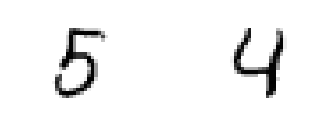

In [136]:
for i, image in enumerate([image1, image2]):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow((np.reshape(image, (28, 28)) * 255).astype(np.uint8), cmap=plt.cm.gray_r, interpolation='nearest')


In [137]:
scoring_data = {"values": [image1, image2]}


In [138]:
predictions = client.deployments.score(scoring_url, scoring_data)
print("Scoring result: " + str(predictions))

Scoring result: {'values': [3, 4]}
